# Clip Landscan Points with boundaries specified

In [2]:
!pip install memory_profiler

In [3]:
%load_ext memory_profiler

In [4]:
import geopandas as gpd

In [5]:
%%time
%%memit
usa_counties = gpd.read_file('../counties_shp_correct/counties.shp')

peak memory: 361.52 MiB, increment: 256.09 MiB
CPU times: user 5.79 s, sys: 708 ms, total: 6.5 s
Wall time: 6.61 s


In [6]:
IL = usa_counties[usa_counties.STATE_NAME == 'Illinois']
chicago = IL[(IL.NAME == 'Cook')]

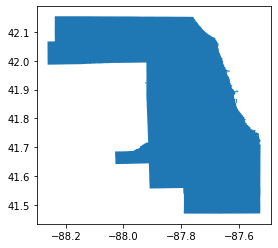

In [7]:
chicago.plot()

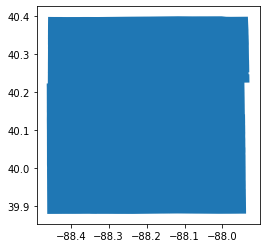

In [8]:
champaign_county = IL[IL.NAME == 'Champaign']
champaign_county.plot()

In [9]:
IL_Mun = gpd.read_file('IL_Municipality_2000/IL_Municipality_2000_Py.shp')
cu_bound = IL_Mun[(IL_Mun.NAME=='Champaign') | (IL_Mun.NAME=='Urbana') | (IL_Mun.NAME =='Savoy')]
cu_bound

,FIPS_PLACE,NAME,TYPE,geometry
719,77005,Urbana,city,"POLYGON ((-88.21925 40.14888, -88.21883 40.148..."
868,12385,Champaign,city,"POLYGON ((-88.27715 40.16630, -88.27687 40.158..."
901,67860,Savoy,village,"POLYGON ((-88.24626 40.08347, -88.24572 40.083..."


In [10]:
IL_Mun = gpd.read_file('IL_Municipality_2000/IL_Municipality_2000_Py.shp')

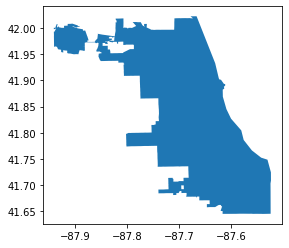

In [11]:
chicago = IL_Mun[IL_Mun.NAME == 'Chicago']
chicago.plot()

In [12]:
del usa_counties
del IL
del IL_Mun

In [ ]:
%%time
%%memit
ls_day = gpd.read_file('pts/day_midwest.shp')

In [ ]:
%%time
%%memit
chi_day = gpd.clip(gdf = ls_day, mask = chicago).to_crs(epsg = 3857)
chi_day.to_file('pts/clipped/chicago_day.shp')

In [ ]:
%%time
%%memit
champaign_county_day = gpd.clip(gdf = ls_day, mask = champaign_county).to_crs(epsg = 3857)
champaign_county_day.to_file('pts/clipped/champaign_day.shp')

In [ ]:
del ls_day

In [13]:
%%time
%%memit
ls_night = gpd.read_file('pts/night_midwest.shp')

peak memory: 5237.20 MiB, increment: 4855.98 MiB
CPU times: user 9min 4s, sys: 14.1 s, total: 9min 18s
Wall time: 9min 18s


In [14]:
%%time
%%memit
chi_night = gpd.clip(gdf = ls_night, mask = chicago).to_crs(epsg = 3857)
chi_night.to_file('pts/clipped/chicago_night.shp')

peak memory: 5502.27 MiB, increment: 583.38 MiB
CPU times: user 21min 25s, sys: 29.2 s, total: 21min 54s
Wall time: 22min 32s


In [15]:
%%time
%%memit
champaign_county_night = gpd.clip(gdf = ls_night, mask = champaign_county).to_crs(epsg = 3857)
champaign_county_night.to_file('pts/clipped/champaign_night.shp')

peak memory: 5384.98 MiB, increment: 40.43 MiB
CPU times: user 20min 53s, sys: 35 s, total: 21min 28s
Wall time: 22min 7s


In [16]:
del ls_night

In [18]:
cu_night = gpd.clip(gdf = champaign_county_night, mask = cu_bound.to_crs(epsg = 3857))

In [19]:
cu_night.to_file('pts/clipped/champaign_urbana_night.shp')

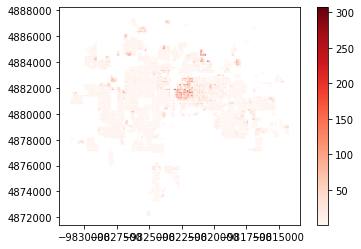

In [29]:
cu_night.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)

In [22]:
cu_day = gpd.clip(gdf = champaign_county_day, mask = cu_bound.to_crs(epsg = 3857))

NameError: name 'champaign_county_day' is not defined

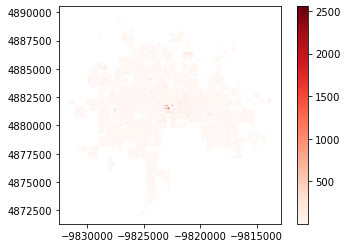

In [28]:
cu_day = gpd.read_file('pts/clipped/champaign_urbana_day.shp')
cu_day.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)

In [ ]:
cu_day.to_file('pts/clipped/champaign_urbana_day.shp')

## Validations!

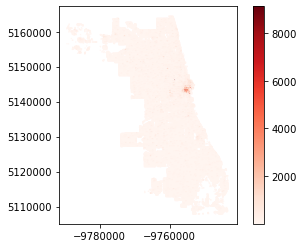

In [30]:
chicago_day = gpd.read_file('pts/clipped/chicago_day.shp')
chicago_day.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)

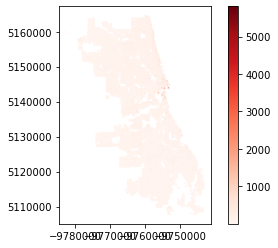

In [31]:
chicago_night = gpd.read_file('pts/clipped/chicago_night.shp')
chicago_night.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)

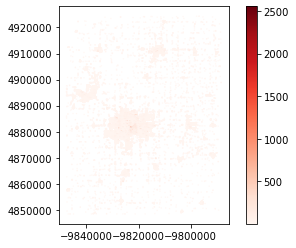

In [32]:
champaign_day = gpd.read_file('pts/clipped/champaign_day.shp')
champaign_day.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)

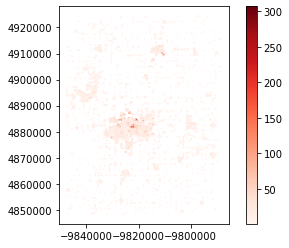

In [33]:
champaign_night = gpd.read_file('pts/clipped/champaign_night.shp')
champaign_night.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)

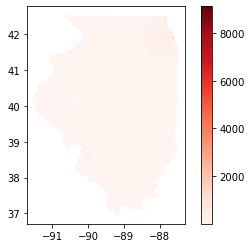

In [34]:
IL_day = gpd.read_file('pts/day_IL2.shp')
IL_day.plot(markersize = 0.1, cmap='Reds', column = 'VALUE', legend=True)